In [269]:
import pandas as pd
import numpy as np

In [270]:
data=pd.read_excel("/content/project today.xlsx")

In [271]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [272]:
data.drop(['ID'],axis=1)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0
...,...,...,...,...,...,...,...,...,...,...
22218,13.0,49.0,B,M,South East,London,Silver,500.00,9.0,0
22219,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0
22220,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22221,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0


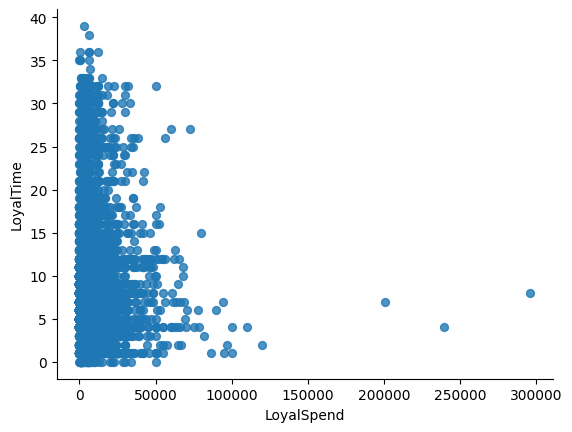

In [273]:
# @title LoyalSpend vs LoyalTime

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='LoyalSpend', y='LoyalTime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

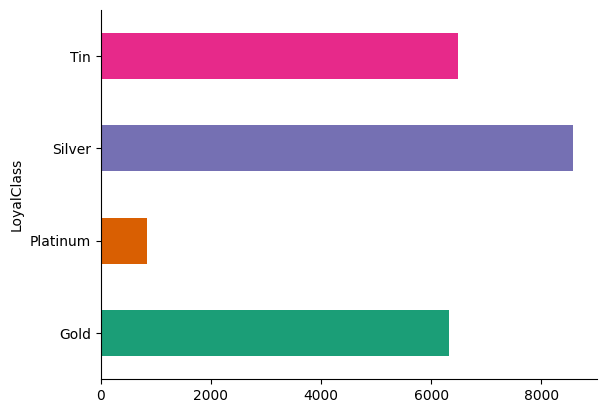

In [274]:
# @title LoyalClass

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('LoyalClass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

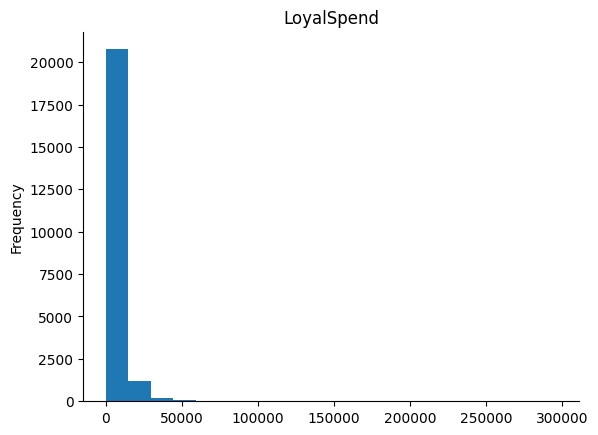

In [275]:
# @title LoyalSpend

from matplotlib import pyplot as plt
data['LoyalSpend'].plot(kind='hist', bins=20, title='LoyalSpend')
plt.gca().spines[['top', 'right',]].set_visible(False)

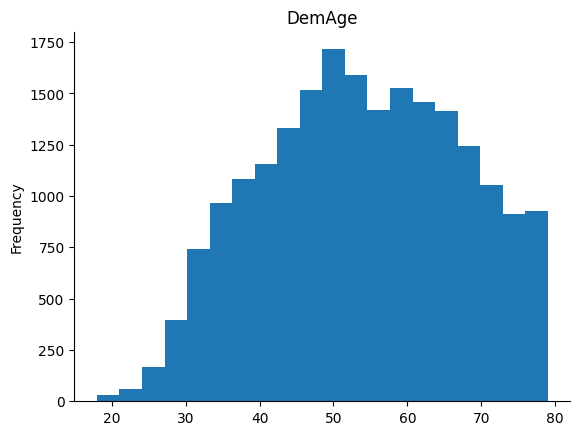

In [276]:
# @title DemAge

from matplotlib import pyplot as plt
data['DemAge'].plot(kind='hist', bins=20, title='DemAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

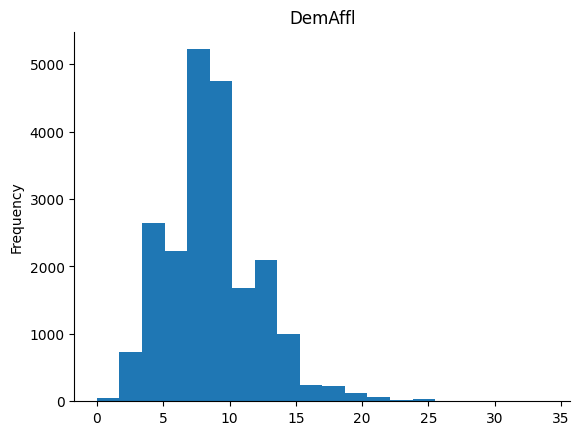

In [277]:
# @title DemAffl

from matplotlib import pyplot as plt
data['DemAffl'].plot(kind='hist', bins=20, title='DemAffl')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [280]:
#analyse null values in dataset
data.isna().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

In [281]:
#filling the missing values with mean or mode
data['DemAffl']=data['DemAffl'].fillna(data['DemAffl'].mode()[0])
data['DemAge']=data['DemAge'].fillna(data['DemAge'].mode()[0])
data['DemGender']=data['DemGender'].fillna(data['DemGender'].mode()[0])
data['DemReg']=data['DemReg'].fillna(data['DemReg'].mode()[0])
data['DemTVReg']=data['DemTVReg'].fillna(data['DemTVReg'].mode()[0])
data['LoyalTime']=data['LoyalTime'].fillna(data['LoyalTime'].mean())
data['DemClusterGroup']=data['DemClusterGroup'].fillna(data['DemClusterGroup'].mode()[0])

In [282]:
data.isna().sum()

ID                 0
DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [283]:
#using label encoding to convert the numerical data
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [284]:
data['DemClusterGroup']=LabelEncoder.fit_transform(data['DemClusterGroup'])

In [285]:
data['DemClusterGroup'].unique()

array([2, 1, 4, 3, 5, 0, 6])

In [286]:
data['DemGender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [287]:
data['DemGender']=LabelEncoder.fit_transform(data['DemGender'])

In [288]:
data['DemGender'].unique()

array([0, 1, 2])

In [289]:
data['DemGender'].unique()

array([0, 1, 2])

In [290]:
data['DemReg']=LabelEncoder.fit_transform(data['DemReg'])

In [291]:
data['DemGender'].unique()

array([0, 1, 2])

In [292]:
data['DemTVReg'].unique()

array(['London', 'East', 'Ulster', 'S & S East', 'Yorkshire',
       'Wales & West', 'N West', 'Midlands', 'S West', 'N East', 'N Scot',
       'C Scotland', 'Border'], dtype=object)

In [293]:
data['DemTVReg']=LabelEncoder.fit_transform(data['DemTVReg'])

In [294]:
data['DemTVReg'].unique()

array([ 3,  2, 10,  8, 12, 11,  7,  4,  9,  5,  6,  1,  0])

In [295]:
data['LoyalClass'].unique()

array(['Tin', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [296]:
data['LoyalClass']=LabelEncoder.fit_transform(data['LoyalClass'])

In [297]:
data['LoyalClass'].unique()

array([3, 0, 2, 1])

In [298]:
#count of customers in each loyal_class
data['LoyalClass'].value_counts()

LoyalClass
2    8572
3    6487
0    6324
1     840
Name: count, dtype: int64

In [299]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,8415498,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,12107603,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,14400995,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,28724674,14.0,67.0,2,0,3,3,3,0.01,7.00000,0


In [300]:
x=data.drop(['TargetBuy'],axis=1)#independent variable
y=data['TargetBuy']#dependent variable

In [301]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.16)

In [302]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [303]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [304]:
predictions=classifier.predict(x_test)

In [305]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(predictions,y_test)
ac=accuracy_score(predictions,y_test)

In [306]:
print(cm)
print(ac)

[[2670  886]
 [   0    0]]
0.750843644544432


In [361]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(10)

In [362]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [363]:
KNN_predict=KNN.predict(x_test)

In [364]:
print(KNN_predict)

[0 1 0 ... 0 0 0]


In [365]:
ac1=accuracy_score(KNN_predict,y_test)

In [366]:
print(ac1)

0.7404386951631046
